##  IBM Data Science Professional Certificate Capstone - Vikas Sharma

### 1. Import relevant libraries

In [39]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import matplotlib.pyplot as plt # library to plot visualizations
import folium # map rendering library
import json # library to handle JSON files
import geocoder # to get coordinates
import time # to use a timer

print('Success! - All libraries imported.')

Success! - All libraries imported.


### 2. Download data on Singapore townships 

#### Source - https://data.gov.sg/dataset/estimated-resident-population-living-in-hdb-flats?resource_id=b29c1af8-e11a-4e61-b813-933db9f69633

Data was downloaded from the above source site in CSV format and saved on local disk as 'SGTownData.csv'

### 3. Exploring and cleaning the township data 

In [40]:
#reading the csv file into a Pandas dataframe named 'towndata' and checking the first 5 rows
towndata = pd.read_csv('D:/Coursera/Capstone/Data/SGTowndata.csv')
towndata.head()

,financial_year,town_or_estate,population
0,2008,Ang Mo Kio,148200
1,2008,Bedok,197900
2,2008,Bishan,66500
3,2008,Bukit Batok,109100
4,2008,Bukit Merah,140600


In [41]:
towndata['financial_year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

We see that the dataframe has historical information on the town population from 2008 to 2018. We will need to use only the latest information, so only information for year 2018 is retained in a new dataframe named 'df'. We see that df has 26 rows, with each row representing one town

In [42]:
df = towndata[towndata['financial_year']==2018] #select only information for 2018
df = df.reset_index().drop(columns=['index'])   #reset index to start from 0
df.shape

(26, 3)

In [43]:
df

,financial_year,town_or_estate,population
0,2018,Ang Mo Kio,141600
1,2018,Bedok,191300
2,2018,Bishan,62100
3,2018,Bukit Batok,115200
4,2018,Bukit Merah,144300
5,2018,Bukit Panjang,120100
6,2018,Bukit Timah,8300
7,2018,Central Area,27300
8,2018,Choa Chu Kang,168500
9,2018,Clementi,71900


Now that we have the latest information in df, we drop the column 'financial_year' and also rename the column 'town_or_estate' to 'town' for ease of reference

In [44]:
df = df.drop(columns=['financial_year'])
df = df.rename(columns={'town_or_estate':'Town'})

As per John's specifications, we only retain those towns for consideration that have above median population

In [45]:
df = df[df['population']>df['population'].median()] #select only those towns that have > median population
df = df.reset_index().drop(columns='index')         #reset index to start from 0

##### We end up with our cleaned and processed dataframe that has the names of the 13 candidate towns for further consideration. We make a copy of it and name it df2. We can now also drop the column 'population' because it is not relevant for further analysis

In [46]:
df2 = df.copy()

df2 = df2.drop(columns=['population'])

#our cleaned and proceesed dataframe for further analysis
df2

,Town
0,Ang Mo Kio
1,Bedok
2,Bukit Batok
3,Bukit Merah
4,Bukit Panjang
5,Choa Chu Kang
6,Hougang
7,Jurong West
8,Punggol
9,Sengkang


### 4. Getting geographical coordinates for the towns 

Using the ArcGIS system, latitude and longitude coordinates are extracted for each of the 13 towns, and added to two lists named 'latlist' (for latitude information) and 'longlist' for longitude information. Since geocoding can be a time-consuming process, we also initiate a timer to check how long the entire geocoding process takes.

In [47]:
#intiate lists to hold the latitude and longitude coordinates
latlist = []
longlist = []

start = time.time() #start timer

#loop through each row of our town dataframe and geocode each town, adding the information to latlist and longlist
for i in range(0,df2.shape[0]):
    town_name = df2.iloc[i,0]
    g = geocoder.arcgis('{},Singapore'.format(town_name))
    latlist.append(g.latlng[0])
    longlist.append(g.latlng[1])

end = time.time() #stop timer

print('All towns geocoded successfully!')
print('Time taken -->',round((end-start),2),'seconds')

All towns geocoded successfully!
Time taken --> 15.03 seconds


The latitude and longitude information extracted above is added to our town dataframe as two new columns

In [48]:
df2['Latitude'] = latlist
df2['Longitude'] = longlist

We then check the first 5 rows of the dataframe to check that the coordinate information has been successfully added

In [49]:
df2.head()

,Town,Latitude,Longitude
0,Ang Mo Kio,1.37161,103.84546
1,Bedok,1.32425,103.95297
2,Bukit Batok,1.34952,103.75277
3,Bukit Merah,1.28417,103.82306
4,Bukit Panjang,1.37877,103.76977


To get a visual understanding of where these towns are in Singapore, we plot them on a map of Singapore using the folium library

In [51]:
#geocode Singapore using ArcGIS and capture the coordinates in Singloc
g = geocoder.arcgis('Singapore')
Singloc = g.latlng 

#initiate a map object with Singapore's location (Singloc) using the folium library and name the map SingMap
SingMap = folium.Map(location=Singloc, zoom_start=11) 

#loop through each row of our town dataframe and add markers on SingMap for each town using folium's CircleMarker
for i in range(0,df2.shape[0]):
    label = df2.iloc[i,0]
    label = folium.Popup(label,parse_html=True)
    loc = [df2.iloc[i,1],df2.iloc[i,2]]
    
    x = folium.CircleMarker(
        location=loc,
        color='red',
        popup=label,
        fill=True,
        parse_html=False)
    
    x.add_to(SingMap)

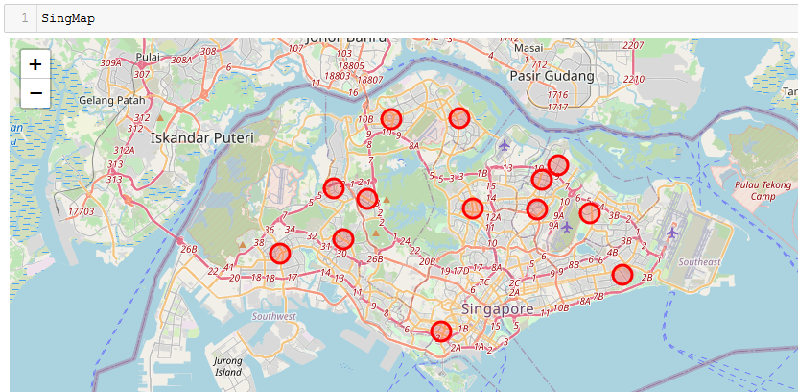

In [58]:
from IPython.display import Image
Image(filename='D:/Coursera/Capstone/SingMap.png')